# Discrete Choice Dynamic Programming
### by [Jason DeBacker](http://jasondebacker.com), November 2019
This Jupyter notebook will introduce you to the theory of discrete choice dynamic programming and solve an example problem using value function iteration.

## Example: McCall job search model

Consider a simple search model of unemployment.  Workers try to maximize their discounted lifetime utility:
    
   $$ E \sum_{t=0}^{\infty}\beta^{t} u(y_{t}) $$

It is assumed that $u'>0$, $u''<0$, and $\beta < 1$.

Employed workers earn a wage $w$ per period (labor supply is exogenous).  Unemployed workers get unemployment insurance of amount $c$ per period.  Thus, $y_{t}=w$ if employed in period $t$ and $y_{t}=c$ if unemployed in period $t$.

Workers transition between states of employment and unemployment.  With probability $\alpha$ an employed worker loses her job.  Unemployed workers reviece an offer each period to work for wage $w'$, which is drawn from the distribution $p$.  For simplicity, we assume no job search is undertaken on the job - employed workers work for the wage they've agreed to until exogenously separated from their job.

Unemployed workers have a decision to make.  They can accept the offer to work for $w'$ and begin work next period earning that wage.  Of they can reject the offer, remain unemployed, and recieve a job offer next period.

This problem is thus an example of a wider class of problems called *optimal stopping problems*.  The answer to this problem is the answer to the question - at what wage does it make sense for the worker to accept the offer rather than wait for a better one to come by?  Obviously this answer will depend on the risk aversion of the worker (i.e., the curvature of $u(\cdot)$, how much she discounts the future (given by $\beta$), and what the distribution of wages look like.

Let's write the Bellman equation describing this model.  In doing so, we need to consider that the worker can be in one of two states - employed or unemployed.  Let's let $U$ denote the lifetime value of being in the unemployed state today, $E(w)$ be the lifetime value of accepting and being employed at wage $w$, and $V(w)$ be the lifetime value of having a job offer at wage $w$.  Thus we have:


$$ E(w) = u(w) + \beta\left[\alpha U + (1-\alpha)E(w)\right] $$

and

$$ U = u(c) + \beta \int_{w'} V(w') \}dw' $$

and

$$ V(w) = \max\left\{U(w), E(w)\right\} $$


Let's solve this on the computer to illustrate how solving a discrete choice DPP works.


In [48]:
# imports
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

# Set parameter values
alpha = 0.25 # Probability of spoilage
h = 0.1  # Holding cost of inventory
K = 100.0  # Fixed Cost of Ordering
c = 7.0  # per unit cost of production

# discretize grid for w
n = 1000  # number of time periods of demand
w_vec = np.linspace(10, 200, n)  # Demand between 10 and 20
            
# probabilities for each value of w -- assume drawn from a beta distribution
a, b = 2, 5  # shape parameters of beta
pdf = scipy.stats.beta.pdf(w_vec / (1.1 * w_vec.max()), a, b)
p_vec = pdf / pdf.sum()

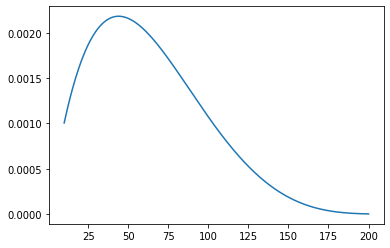

In [49]:
# Plot distributino of demand
plt.plot(w_vec, p_vec)
plt.show()

In [50]:
# A default production function
def u(d):
    return K + np.log(d)

# A default holding cost function
def u1(d1):
    return np.log(d1)

In [52]:
# VFI 
VFtol = 1e-6
VFdist = 7.0
VFmaxiter = 3000
U = np.zeros_like(w_vec)#np.ones_like(w_vec) * (u(c, sigma) / (1 - beta))  # initial guess at value function for unemployed
E = np.zeros_like(w_vec)  #u(w_vec, sigma) / (1 - beta) # intial guess at value of being employed at each wage
V = np.max((U, E), axis=0)  # initial guess at value function
Vstore = np.empty((n, VFmaxiter))  # initialize Vstore array
VFiter = 1
while VFdist > VFtol and VFiter < VFmaxiter:
    EV = (p_vec * V).sum()  # expected VF, integrating over w'
    U =  h * u1(EV)
    E = u(w_vec) + ((alpha * U) + (1 - alpha) * E)
    TV = np.minimum(U, E)
    PF = E >= U  # PF is 0/1 (reject or accept offer)
    Vstore[:, VFiter] = V
    VFdist = (np.absolute(V - TV)).min()  # check distance between value
    print('VF iteration ', VFiter, ',  distance = ', VFdist)
    V = TV  # update value function
    # function for this iteration and value function from past iteration
    VFiter += 1

VF iteration  1 ,  distance =  inf
VF iteration  2 ,  distance =  nan


C:\Users\Devashish\Anaconda3_1\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\Devashish\Anaconda3_1\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\Devashish\Anaconda3_1\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater_equal
  from ipykernel import kernelapp as app


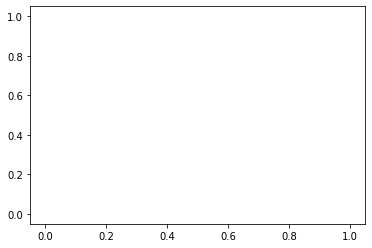

In [53]:
# plot cost function:
plt.plot(w_vec, V)
plt.show()

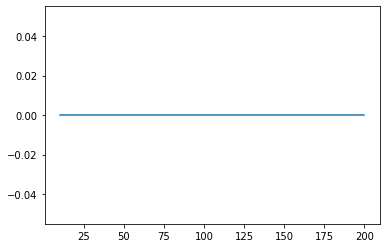

In [54]:
# plot policy function
plt.plot(w_vec, PF)
plt.show()

In [14]:
# see wage that is reservation wage
w_vec[PF][0]

10.0